In [1]:
import pandas as pd

datasetdir = 'dataset/'
df1 = pd.read_csv(datasetdir+'dataset_type_1.csv')
df2 = pd.read_csv(datasetdir+'dataset_type_2_vers2_hidropobicity.csv')
df22 = pd.read_csv(datasetdir+'dataset_type_2_char2.csv')
df222 = pd.read_csv(datasetdir+'dataset_type_2_char2_vers2.csv')

## analisis dataset tipe 1

In [4]:
print(f"total label Epitop : {len(df1[df1['label'] == 'E'])}")
print(f"total label Non-epitop : {len(df1[df1['label'] == '.'])}")

total label Epitop : 7627
total label Non-epitop : 14615


In [6]:
df1.describe()

,Epitope - Starting Position,Epitope - Ending Position
count,22242.000000,22242.000000
mean,2374.659113,2389.184021
std,2222.191385,2222.155770
min,1.000000,11.000000
25%,404.000000,419.000000
50%,1408.500000,1423.500000
75%,4237.750000,4252.000000
max,7085.000000,7097.000000


## analisis dataset tipe 2(dibagi-bagi dalam 1 char)

In [2]:
print(f"total label Epitop : {len(df2[df2['label'] == 'E'])}")
print(f"total label Non-epitop : {len(df2[df2['label'] == '.'])}")

total label Epitop : 120143
total label Non-epitop : 225185


In [3]:
df2.describe()

,Position,Kyte-Doolittle,Hopp-Woods,Cornette,Eisenberg,Rose,Janin,Engelman GES,Position z-score
count,345328.000000,345328.000000,345328.000000,345328.000000,345328.000000,345328.000000,345328.000000,345328.000000,3.453280e+05
mean,2376.698579,-0.115668,-0.155594,0.960727,0.069188,0.730689,-0.099027,-1.093215,9.662433e-17
std,2220.231513,3.015657,1.773088,3.064323,0.961643,0.110822,0.683957,4.659313,1.000001e+00
min,1.000000,-4.500000,-3.400000,-3.100000,-2.530000,0.520000,-1.800000,-12.300000,-1.070024e+00
25%,412.000000,-3.500000,-1.800000,-1.900000,-0.740000,0.630000,-0.500000,-4.100000,-8.849084e-01
50%,1400.000000,-0.700000,-0.400000,0.200000,0.260000,0.720000,-0.100000,1.000000,-4.399091e-01
75%,4238.000000,2.800000,0.300000,4.400000,1.060000,0.850000,0.500000,2.600000,8.383379e-01
max,7097.000000,4.500000,3.000000,5.700000,1.380000,0.910000,0.900000,3.700000,2.126043e+00


In [2]:
import pandas as pd

coldf2 = list(df2.columns)
coldf2.remove('amino')
coldf2.remove('label')

variances = []
for col in coldf2:
    variances.append(df2[col].var())

df_variances = pd.DataFrame({'Kolom': coldf2, 'Varians': variances})
print("DataFrame Varians antar kolom:")
df_variances

DataFrame Varians antar kolom:


,Kolom,Varians
0,Position,4.929428e+06
1,Kyte-Doolittle,9.094185e+00
2,Hopp-Woods,3.143842e+00
3,Cornette,9.390077e+00
4,Eisenberg,9.247573e-01
5,Rose,1.228157e-02
6,Janin,4.677977e-01
7,Engelman GES,2.170920e+01
8,Position z-score,1.000003e+00


In [3]:
df2

,Position,amino,label,Kyte-Doolittle,Hopp-Woods,Cornette,Eisenberg,Rose,Janin,Engelman GES,Position z-score
0,1175.0,S,E,-0.8,0.3,-0.5,-0.18,0.66,-0.1,0.6,-0.541250
1,1176.0,V,E,4.2,-1.5,4.7,1.08,0.86,0.6,2.6,-0.540800
2,1177.0,V,E,4.2,-1.5,4.7,1.08,0.86,0.6,2.6,-0.540349
3,1178.0,N,E,-3.5,0.2,-0.5,-0.78,0.63,-0.5,-4.8,-0.539899
4,1179.0,I,E,4.5,-1.8,4.8,1.38,0.88,0.7,3.1,-0.539448
...,...,...,...,...,...,...,...,...,...,...,...
345323,878.0,L,.,3.8,-1.8,5.7,1.06,0.85,0.5,2.8,-0.675020
345324,879.0,A,.,1.8,-0.5,0.2,0.62,0.74,0.3,1.6,-0.674570
345325,880.0,G,.,-0.4,0.0,0.0,0.48,0.72,0.3,1.0,-0.674119
345326,881.0,T,.,-0.7,-0.4,-1.9,-0.05,0.70,-0.2,1.2,-0.673669


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df2['z-score'] = scaler.fit_transform(df2[['Position']])
df2.to_csv(datasetdir+'dataset_type_2.csv', index=False)

In [5]:
coldf2 = list(df2.columns)
coldf2.remove('amino')
coldf2.remove('label')
print(f"Nilai Varians antar kolom")
for i in range(len(coldf2)):
    print(f"kolom : {coldf2[i]} ==> var = {df2[coldf2[i]].var()}")

Nilai Varians antar kolom
kolom : Position ==> var = 4929427.970834667
kolom : Kyte-Doolittle ==> var = 9.094185394825002
kolom : Hopp-Woods ==> var = 3.143841563363396
kolom : Cornette ==> var = 9.390077237480329
kolom : Eisenberg ==> var = 0.9247572543858388
kolom : Rose ==> var = 0.012281565333116386
kolom : Janin ==> var = 0.46779766213067797
kolom : Engelman GES ==> var = 21.709197254699003
kolom : Position z-score ==> var = 1.0000028958060043
kolom : z-score ==> var = 1.0000028958060043


In [6]:
df2

,Position,amino,label,Kyte-Doolittle,Hopp-Woods,Cornette,Eisenberg,Rose,Janin,Engelman GES,Position z-score,z-score
0,1175.0,S,E,-0.8,0.3,-0.5,-0.18,0.66,-0.1,0.6,-0.541250,-0.541250
1,1176.0,V,E,4.2,-1.5,4.7,1.08,0.86,0.6,2.6,-0.540800,-0.540800
2,1177.0,V,E,4.2,-1.5,4.7,1.08,0.86,0.6,2.6,-0.540349,-0.540349
3,1178.0,N,E,-3.5,0.2,-0.5,-0.78,0.63,-0.5,-4.8,-0.539899,-0.539899
4,1179.0,I,E,4.5,-1.8,4.8,1.38,0.88,0.7,3.1,-0.539448,-0.539448
...,...,...,...,...,...,...,...,...,...,...,...,...
345323,878.0,L,.,3.8,-1.8,5.7,1.06,0.85,0.5,2.8,-0.675020,-0.675020
345324,879.0,A,.,1.8,-0.5,0.2,0.62,0.74,0.3,1.6,-0.674570,-0.674570
345325,880.0,G,.,-0.4,0.0,0.0,0.48,0.72,0.3,1.0,-0.674119,-0.674119
345326,881.0,T,.,-0.7,-0.4,-1.9,-0.05,0.70,-0.2,1.2,-0.673669,-0.673669


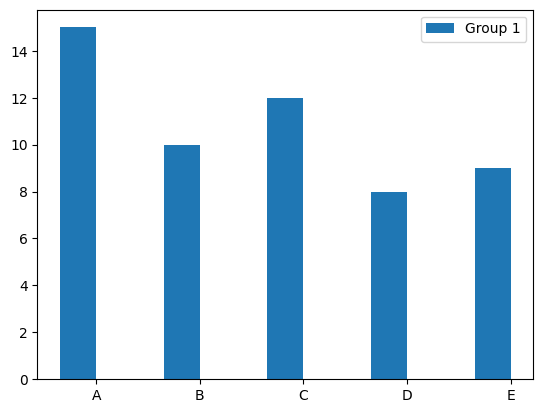

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [15, 10, 12, 8, 9]
values2 = [7, 11, 9, 13, 6]

# Mengatur lebar batang
bar_width = 0.35

# Mengatur posisi grup batang
x = np.arange(len(categories))

# Membuat plot batang pertama
plt.bar(x, values1, width=bar_width, label='Group 1')

# Membuat plot batang kedua dengan offset pada posisi x
#plt.bar(x + bar_width, values2, width=bar_width, label='Group 2')

# Mengatur label sumbu x
plt.xticks(x + bar_width/2, categories)

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()


In [8]:
dtest = pd.read_csv('result_of_classification.csv')
col = ['algoritm','prop_scale','accuracy', 'auc','test_size']
dtest = dtest[col]
dtest[dtest['test_size'] == 0.1]

,algoritm,prop_scale,accuracy,auc,test_size
0,hmm,Kyte-Doolittle,0.584426,0.534152,0.1
1,nn,Hopp-Woods,0.649958,0.608049,0.1
2,dl,Cornette,0.650624,0.606089,0.1
3,dt,Eisenberg,0.679321,0.693993,0.1
4,rf,Rose,0.676744,0.692492,0.1
5,svm,Janin,0.649958,0.547177,0.1
18,hmm,Rose,0.433122,0.414832,0.1
19,nn,Janin,0.651609,0.607532,0.1
20,dl,Engelman GES,0.649929,0.610220,0.1
21,dt,Kyte-Doolittle,0.677207,0.691123,0.1


/tmp/ipykernel_4760/2767556846.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val0 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[0]][evaluation]
/tmp/ipykernel_4760/2767556846.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val1 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[1]][evaluation]
/tmp/ipykernel_4760/2767556846.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val2 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[2]][evaluation]
/tmp/ipykernel_4760/2767556846.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val3 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[3]][evaluation]
/tmp/ipykernel_4760/2767556846.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  val4 = dtest[dtest['test_size'] == test_size][dtest['pro

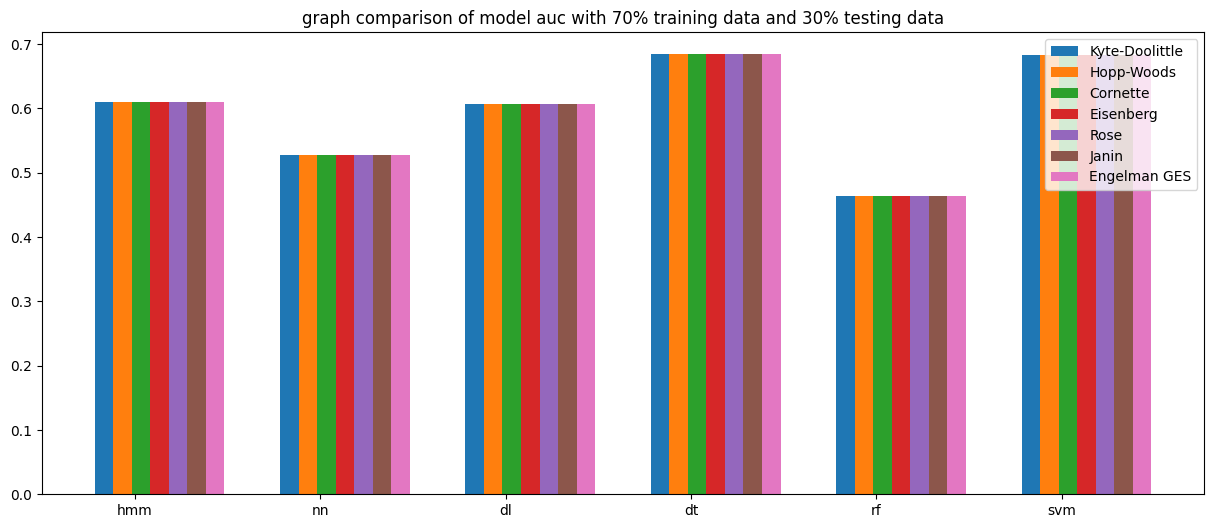

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 6))

test_size = 0.3
evaluation = 'auc'
hydro = dtest['prop_scale'].unique()
categories = dtest['algoritm'].unique()
val0 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[0]][evaluation]
val1 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[1]][evaluation]
val2 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[2]][evaluation]
val3 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[3]][evaluation]
val4 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[4]][evaluation]
val5 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[5]][evaluation]
val6 = dtest[dtest['test_size'] == test_size][dtest['prop_scale'] == hydro[6]][evaluation]
bar_width = 0.10
x = np.arange(len(categories))
n = 0
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 1
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 2
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 3
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 4
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 5
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
n = 6
X = x + (bar_width*n)
plt.bar(X, val0, width=bar_width, label=hydro[n])
plt.xticks(x + (bar_width*10)/6, categories)
plt.title(f"graph comparison of model {evaluation} with {int((1-test_size)*100)}% training data and {int((test_size)*100)}% testing data")
plt.legend()
plt.show()

In [14]:
val4

32     0.611271
53     0.505987
67     0.608369
88     0.684289
102    0.412432
123    0.683245
Name: auc, dtype: float64

In [8]:
len(dtest)

126

In [31]:
import pandas as pd

def hoop_woods(amino_acid):
    scale_dict = {'A': 1.0, 'R': -3.0, 'N': -3.0, 'D': -3.0, 'C': 2.0, 'Q': -3.0, 'E': -3.0, 'G': 0.0, 'H': -3.0, 'I': 1.0, 'L': 1.0, 'K': -3.0, 'M': 1.0, 'F': 1.0, 'P': -1.0, 'S': -2.0, 'T': -2.0, 'W': 1.0, 'Y': 0.0, 'V': 1.0}
    return scale_dict.get(amino_acid, 0.0)

def emini(amino_acid):
    scale_dict = {'A': 0.92, 'R': 1.02, 'N': 0.92, 'D': 0.92, 'C': 1.19, 'Q': 0.92, 'E': 0.92, 'G': 0.74, 'H': 0.92, 'I': 1.02, 'L': 1.02, 'K': 0.92, 'M': 1.02, 'F': 1.02, 'P': 0.92, 'S': 0.92, 'T': 0.92, 'W': 1.02, 'Y': 1.02, 'V': 1.02}
    return scale_dict.get(amino_acid, 0.0)

def parker(amino_acid):
    scale_dict = {'A': 1.53, 'R': -1.36, 'N': -0.12, 'D': -0.92, 'C': 1.47, 'Q': -0.71, 'E': -0.63, 'G': 0.74, 'H': -0.4, 'I': 1.61, 'L': 1.3, 'K': -1.62, 'M': 1.18, 'F': 1.38, 'P': 0.32, 'S': -0.25, 'T': -0.18, 'W': 1.37, 'Y': 0.96, 'V': 1.24}
    return scale_dict.get(amino_acid, 0.0)

def levitt(amino_acid):
    scale_dict = {'A': 1.23, 'R': 0.79, 'N': 0.68, 'D': 0.89, 'C': 0.71, 'Q': 0.97, 'E': 0.97, 'G': 1.15, 'H': 0.97, 'I': 1.18, 'L': 1.21, 'K': 0.73, 'M': 1.45, 'F': 1.13, 'P': 1.22, 'S': 0.79, 'T': 0.82, 'W': 1.08, 'Y': 1.09, 'V': 1.30}
    return scale_dict.get(amino_acid, 0.0)

# Daftar asam amino
amino_acids = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'H', 'I', 'L', 'K', 'M', 'F', 'P', 'S', 'T', 'W', 'Y', 'V']

# Membuat DataFrame
data = {'Amino Acid': amino_acids,
        'Hoop-Woods': [hoop_woods(aa) for aa in amino_acids],
        'Emini': [emini(aa) for aa in amino_acids],
        'Parker': [parker(aa) for aa in amino_acids],
        'Levitt': [levitt(aa) for aa in amino_acids]}

df = pd.DataFrame(data)

# Menampilkan DataFrame
df


,Amino Acid,Hoop-Woods,Emini,Parker,Levitt
0,A,1.0,0.92,1.53,1.23
1,R,-3.0,1.02,-1.36,0.79
2,N,-3.0,0.92,-0.12,0.68
3,D,-3.0,0.92,-0.92,0.89
4,C,2.0,1.19,1.47,0.71
5,Q,-3.0,0.92,-0.71,0.97
6,E,-3.0,0.92,-0.63,0.97
7,G,0.0,0.74,0.74,1.15
8,H,-3.0,0.92,-0.40,0.97
9,I,1.0,1.02,1.61,1.18
